# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<Łukasz Kopciński\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

In [9]:
### kod z pliku main.py


def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:

    if not isinstance(m,int) or not isinstance(n,int): 
        return None

    if m<=0 or n<=0:
        return None
    t=np.linspace(0,1,m)

    b=np.cos(4*t)

    A=np.vander(t,n,increasing=True)

    return A, b
    

def square_from_rectan(
    A: np.ndarray, b: np.ndarray
) -> tuple[np.ndarray, np.ndarray] | None:
    
    if not isinstance(A,np.ndarray) or not isinstance(b,np.ndarray):
        return None
    
    if A.shape[0]!=b.shape[0]:
        return None

    if A.ndim!=2 or b.ndim!=1:
        return None
    
    if A.size==0 or b.size==0:
        return None

    A_new=(np.transpose(A))@A

    b_new=(np.transpose(A))@b

    return A_new, b_new
    

def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:
    

    if not (isinstance(A, np.ndarray) and isinstance(x, np.ndarray) and isinstance(b, np.ndarray)):
        return None

    if (A.shape)[1]!=(x.shape)[0]:
        return None
    
    if A.size==0 or x.size==0 or b.size==0:
        return None
    
    if A.ndim!=2 or x.ndim!=1 or b.ndim!=1:
        return None
    
    if A.shape[0]!=b.shape[0]:
        return None

    Ax=A@x

    r=b-Ax

    residual_norm=np.linalg.norm(r)

    return float(residual_norm)

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [20]:
# ===== Twoja implementacja tutaj =====
m=50
n=12

matrix_vector=spare_matrix_Abt(50,12)

A_matrix=matrix_vector[0]
b_vector=matrix_vector[1]
#metoda 1

def met_1(A_matrix,b_vector):
    A_b_new=square_from_rectan(A_matrix,b_vector)

    A_from_rectan=A_b_new[0]
    b_from_rectan=A_b_new[1]

    x1=np.linalg.solve(A_from_rectan,b_from_rectan)

    return x1

#print(met_1(A_matrix,b_vector),"\n")

#metoda 2

def met_2(A_matrix,b_vector):
    x2,residuals,rank,singular_values=np.linalg.lstsq(A_matrix,b_vector,rcond=None)

    return x2

#print(met_2(A_matrix,b_vector),"\n")

#metoda 3
def met_3(A_matrix,b_vector):
    Q,R=np.linalg.qr(A_matrix)

    c=Q.T @b_vector

    x3=sp.linalg.solve_triangular(R,c,lower=False)

    return x3

#print(met_3(A_matrix,b_vector),"\n")

#metoda 4

def met_4(A_matrix,b_vector):
    U,S,Vh=np.linalg.svd(A_matrix,full_matrices=False)

    S_inv=1.0/S

    U_transposed_multiplied_b=U.T @b_vector

    y=S_inv*U_transposed_multiplied_b

    x4=Vh.T @y

    return x4

x1=met_1(A_matrix,b_vector)
x2=met_2(A_matrix,b_vector)
x3=met_3(A_matrix,b_vector)
x4=met_4(A_matrix,b_vector)

#print(met_4(A_matrix,b_vector),"\n")

# Posegregowanie wyników
xsy=[x1,x2,x3,x4]

#normy
norm=[0,0,0,0]
for i in range(len(xsy)):
    norm[i]=residual_norm(A_matrix,xsy[i],b_vector)

#czas
time=[0,0,0,0]

time[0]=%timeit -r 5 -n 10 -o x1
time[1]=%timeit -r 5 -n 10 -o x2
time[2]=%timeit -r 5 -n 10 -o x3
time[3]=%timeit -r 5 -n 10 -o x4

#pamiec
memory=[0,0,0,0]

memory[0]=%memit -o x1
memory[1]=%memit -o x2
memory[2]=%memit -o x3
memory[3]=%memit -o x4

# Zestawienie wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

38 ns ± 26.4 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
42 ns ± 34.3 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
42 ns ± 24.8 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
46 ns ± 28 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 145.36 MiB, increment: 0.00 MiB
peak memory: 145.36 MiB, increment: 0.00 MiB
peak memory: 145.36 MiB, increment: 0.00 MiB
peak memory: 145.36 MiB, increment: 0.00 MiB
Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  6.230e-08
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  38 ns ± 26.4 ns per loop (mea
Druga metoda    :  42 ns ± 34.3 ns per loop (mea
Trzecia metoda  :  42 ns ± 24.8 ns per loop (mea
Czwarta metoda  :  46 ns ± 28 ns per loop (mean 

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 145.36 MiB, increment: 0.00 MiB
Druga metoda    :  pea

### **Wnioski:**
 po analizie norm residuów, czasu wykonania, zużycia pamięci: łatwo stwierdzić że najmniej dokładna metoda to pierwsza metoda; najszybciej wykonywane były obliczenia dla metod, kolejno: 1,2,3,4 ; za to jeśli chodzi o zużycie pamięci, to każda z metod zużyła tyle samo. Najbardziej jakościowe są wyniki dla metody trzeciej.

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [22]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

Wektor odchyleń od prostej: [ 17.63219059  17.17315514 -35.37768739 -39.56130157  -3.74491575
   2.07147008  15.79604881  21.61243463 -20.9384079   25.33701336] 

Średni błąd bezwzględny: 19.924462521789657 

Błąd średniokwadratowy: 523.7797791981404 



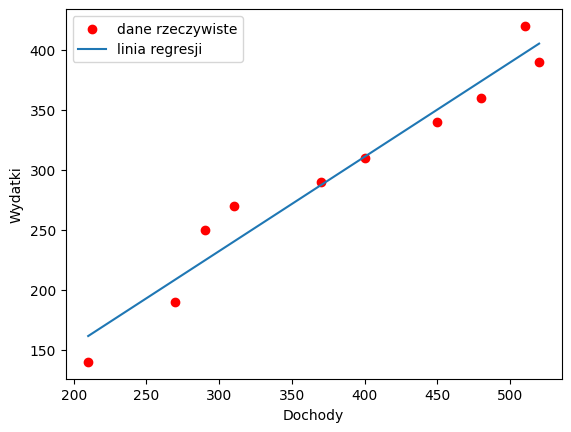

In [43]:
# ===== Twoja implementacja tutaj =====
#średnie
w_ave=np.mean(w)
d_ave=np.mean(d)

#wspł beta alfa oraz wykres danych + lini regresji
beta=0

beta=np.sum((d-d_ave)*(w-w_ave)/np.sum((d-d_ave)**2))
alfa=w_ave-beta*d_ave

w_hat=alfa+beta*d

figure,ax=plt.subplots()

ax.scatter(d,w,color='r', label="dane rzeczywiste")
ax.plot(d,w_hat,label="linia regresji")
ax.set_xlabel("Dochody")
ax.set_ylabel("Wydatki")
ax.legend()

#błąd
a,b=np.polyfit(w,d,1)

d_pred=a*w +b

vector_odch_od_prostej=d-d_pred
print("Wektor odchyleń od prostej:",vector_odch_od_prostej,"\n")

mean_abs_error=np.mean(np.abs(vector_odch_od_prostej))

mean_square_error=np.mean(vector_odch_od_prostej**2)

print("Średni błąd bezwzględny:",mean_abs_error,"\n")
print("Błąd średniokwadratowy:",mean_square_error,"\n")

Odpowiedź na pytanie 2: tak istnieje taka możliwość, należałoby skorzystać z dopasowania modelu nieliniowego lub użycie regresji ważonej.

### **Wnioski:**
wiele punktów odstaje w dosyć znacznym stopniu od prostej. 

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

Norma residuum dla modelu 1:  10.755069515218063 

Norma residuum dla modelu 2:  14.013522718819765 

Norma residuum dla modelu 3:  10.013843080647709 

Norma residuum dla modelu 4:  10.001780623445546 



C:\Users\ela-m\AppData\Local\Temp\ipykernel_9988\1339776893.py:81: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


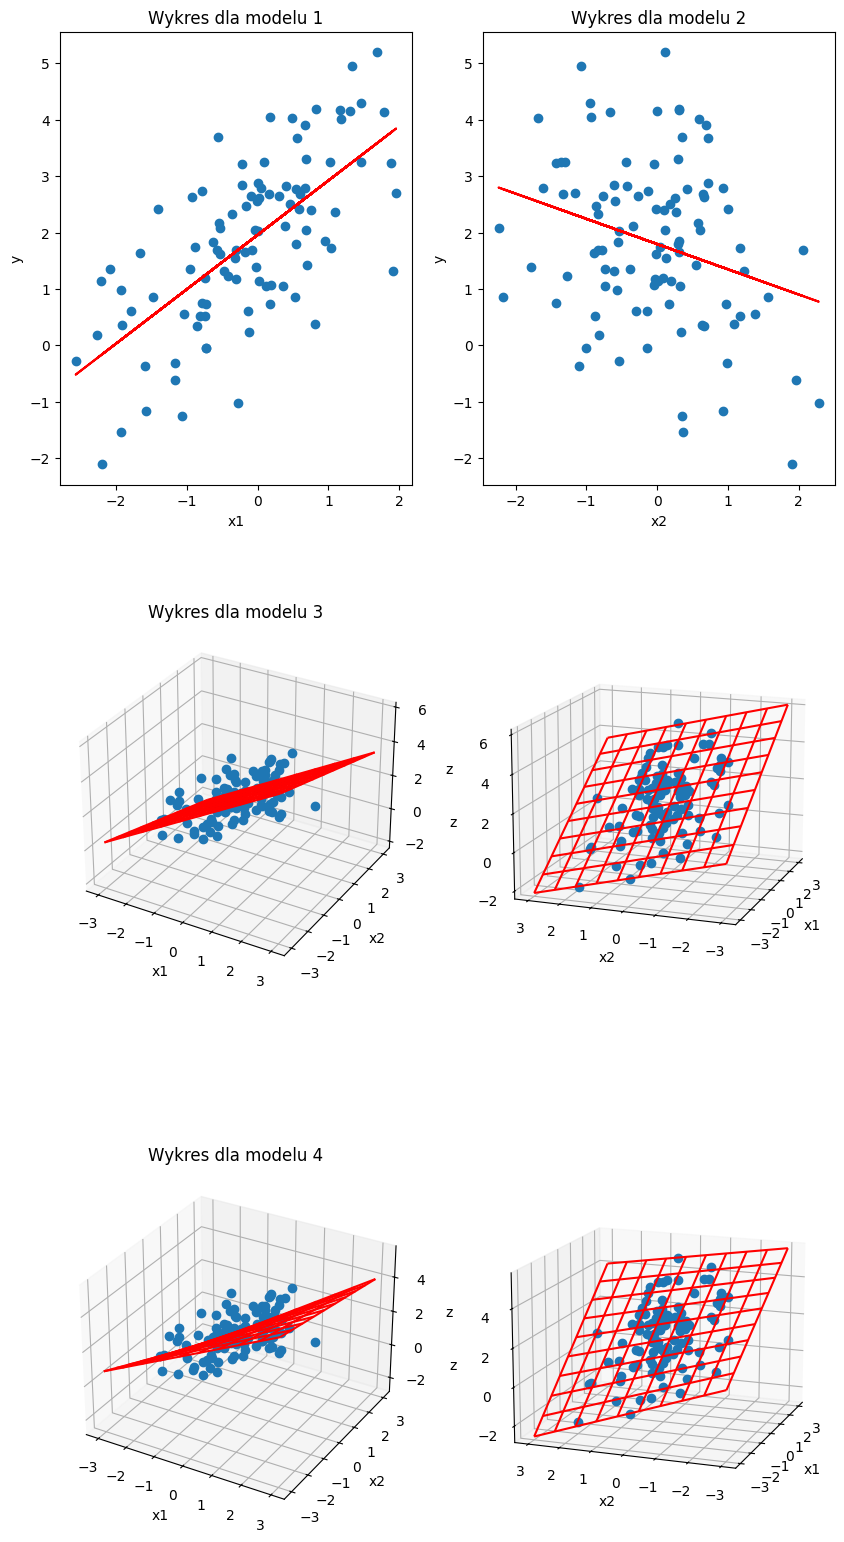

In [12]:
# ===== Twoja implementacja tutaj =====

x1=np.random.normal(loc=0.0,scale=1.0,size=(100,1))
x2=np.random.normal(loc=0.0,scale=1.0,size=(100,1))
eps=np.random.normal(loc=0.0,scale=1.0,size=(100,1))
ones=np.ones([100,1])

one=np.concatenate([ones,x1],1)
two=np.concatenate([ones,x2],1)
three=np.concatenate([ones,x1,x2],1)
four=np.concatenate([ones,x1,x2,x1*x2],1)

y=2+x1-0.5*x2+eps


fig=plt.figure(figsize=(10,20))
ax0=fig.add_subplot(3,2,1)
ax1=fig.add_subplot(3,2,2)
ax2=fig.add_subplot(3,2,3,projection='3d')
ax3=fig.add_subplot(3,2,4,projection='3d')
ax4=fig.add_subplot(3,2,5,projection='3d')
ax5=fig.add_subplot(3,2,6,projection='3d')

# model 1
Q,R=np.linalg.qr(one)
y_q=Q.T@y
a=sp.linalg.solve_triangular(R,y_q)
Y_one=a[0]+a[1]*x1
norm_one=residual_norm(one,a.flatten(),y.flatten())
ax0.plot(x1,y,'o')
ax0.plot(x1,Y_one,'r')
ax0.set(title='Wykres dla modelu 1',xlabel='x1',ylabel='y')

print("Norma residuum dla modelu 1: ", norm_one,"\n")

# model 2
Q,R=np.linalg.qr(two)
y_q=Q.T@y
a=sp.linalg.solve_triangular(R,y_q)
Y_two=a[0]+a[1]*x2
norm_two=residual_norm(two,a.flatten(),y.flatten())
ax1.plot(x2,y,'o')
ax1.plot(x2,Y_two,'r')
ax1.set(title='Wykres dla modelu 2',xlabel='x2',ylabel='y')

print("Norma residuum dla modelu 2: ", norm_two,"\n")
# model 3
Q,R=np.linalg.qr(three)
y_q=Q.T@y
a=sp.linalg.solve_triangular(R,y_q)
X_ax,Y_ax=np.meshgrid(np.linspace(-3,3,10),np.linspace(-3,3,10))
Z_three=a[0]+a[1]*X_ax+a[2]*Y_ax
norm_three=residual_norm(three,a.flatten(),y.flatten())
ax2.plot(x1,x2,y,'o')
ax2.plot_wireframe(X_ax,Y_ax,Z_three,color='r')
ax2.set(title='Wykres dla modelu 3')
ax2.set(xlabel='x1',ylabel='x2',zlabel='z')
ax3.plot(x1,x2,y,'o')
ax3.plot_wireframe(X_ax,Y_ax,Z_three,color='r')
ax3.view_init(15,200,0)
ax3.set(xlabel='x1',ylabel='x2',zlabel='z')

print("Norma residuum dla modelu 3: ", norm_three,"\n")
# model 4
Q,R=np.linalg.qr(four)
y_q=Q.T@y
a=sp.linalg.solve_triangular(R,y_q)
X_ax,Y_ax=np.meshgrid(np.linspace(-3,3,10),np.linspace(-3,3,10))
Z_four=a[0]+a[1]*X_ax+a[2]*Y_ax+a[3]*X_ax*Y_ax
norm_four=residual_norm(four,a.flatten(),y.flatten())
ax4.plot(x1,x2,y,'o')
ax4.plot_wireframe(X_ax,Y_ax,Z_four,color='r')
ax4.set(title='Wykres dla modelu 4')
ax4.set(xlabel='x1',ylabel='x2',zlabel='z')
ax5.plot(x1,x2,y,'o')
ax5.plot_wireframe(X_ax,Y_ax,Z_four,color='r')
ax5.view_init(15,200,0)
ax5.set(xlabel='x1',ylabel='x2',zlabel='z')

print("Norma residuum dla modelu 4: ", norm_four,"\n")
fig.show()


### **Wnioski:**
największa norma wyszła dla modelu 2, jest to zapewne spowodowane tym że x1 ma większy wpływ na y niż x2. Model 4 najlepiej opisuje dane.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)